In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.drop("Name",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [12]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
oe=OrdinalEncoder()
oe.fit_transform(df[["Embarked"]])
embark=['S','C','Q']
enc=OrdinalEncoder(categories=[embark])
enc
enc.fit_transform(df[['Embarked']])
df1=df.copy()
df1["Embarked"]=enc.fit_transform(df[["Embarked"]])
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0.0
1,2,1,1,female,38.0,1,0,71.2833,1.0
2,3,1,3,female,26.0,0,0,7.9250,0.0
3,4,1,1,female,35.0,1,0,53.1000,0.0
4,5,0,3,male,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0.0
887,888,1,1,female,19.0,0,0,30.0000,0.0
888,889,0,3,female,28.0,1,2,23.4500,0.0
889,890,1,1,male,26.0,0,0,30.0000,1.0


In [13]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [14]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()
newdata=be.fit_transform(df1["Sex"])
newdata
df2=df1.copy()
df2["Sex"]=be.fit_transform(df1[["Sex"]])
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,1,28.0,1,2,23.4500,0.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [15]:
df3=df2.copy()
log_PassengerId = np.log1p(df3["PassengerId"])
log_Survived = np.log1p(df3["Survived"])
log_Pclass = np.log1p(df3["Pclass"])
log_Sex = np.log1p(df3["Sex"])
log_Age = np.log1p(df3["Age"])
log_SibSp = np.log1p(df3["SibSp"])
log_Parch = np.log1p(df3["Parch"])
log_Fare = np.log1p(df3["Fare"])
log_Embarked = np.log1p(df3["Embarked"])
df3.insert(1,"log_PassengerId",log_PassengerId)
df3.insert(3,"log_Survived",log_Survived)
df3.insert(5,"log_Pclass",log_Pclass)
df3.insert(7,"log_Sex",log_Sex)
df3.insert(9,"log_Age",log_Age)
df3.insert(11,"log_SibSp",log_SibSp)
df3.insert(13,"log_Parch",log_Parch)
df3.insert(15,"log_Fare",log_Fare)
df3.insert(17,"log_Embarked",log_Embarked)
df3

,PassengerId,log_PassengerId,Survived,log_Survived,Pclass,log_Pclass,Sex,log_Sex,Age,log_Age,SibSp,log_SibSp,Parch,log_Parch,Fare,log_Fare,Embarked,log_Embarked
0,1,0.693147,0,0.000000,3,1.386294,0,0.000000,22.0,3.135494,1,0.693147,0,0.000000,7.2500,2.110213,0.0,0.000000
1,2,1.098612,1,0.693147,1,0.693147,1,0.693147,38.0,3.663562,1,0.693147,0,0.000000,71.2833,4.280593,1.0,0.693147
2,3,1.386294,1,0.693147,3,1.386294,1,0.693147,26.0,3.295837,0,0.000000,0,0.000000,7.9250,2.188856,0.0,0.000000
3,4,1.609438,1,0.693147,1,0.693147,1,0.693147,35.0,3.583519,1,0.693147,0,0.000000,53.1000,3.990834,0.0,0.000000
4,5,1.791759,0,0.000000,3,1.386294,0,0.000000,35.0,3.583519,0,0.000000,0,0.000000,8.0500,2.202765,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,6.788972,0,0.000000,2,1.098612,0,0.000000,27.0,3.332205,0,0.000000,0,0.000000,13.0000,2.639057,0.0,0.000000
887,888,6.790097,1,0.693147,1,0.693147,1,0.693147,19.0,2.995732,0,0.000000,0,0.000000,30.0000,3.433987,0.0,0.000000
888,889,6.791221,0,0.000000,3,1.386294,1,0.693147,28.0,3.367296,1,0.693147,2,1.098612,23.4500,3.196630,0.0,0.000000
889,890,6.792344,1,0.693147,1,0.693147,0,0.000000,26.0,3.295837,0,0.000000,0,0.000000,30.0000,3.433987,1.0,0.693147


<AxesSubplot:ylabel='Frequency'>

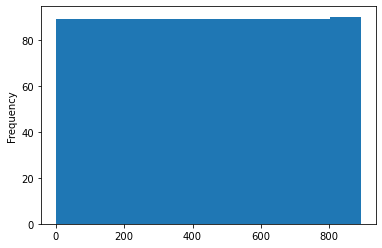

In [16]:
df3["PassengerId"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

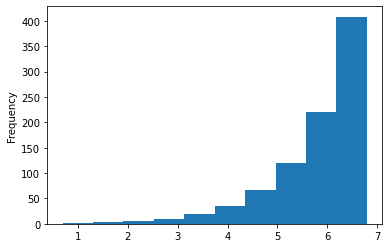

In [17]:
df3["log_PassengerId"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

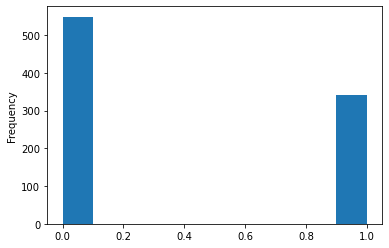

In [26]:
df3["Survived"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

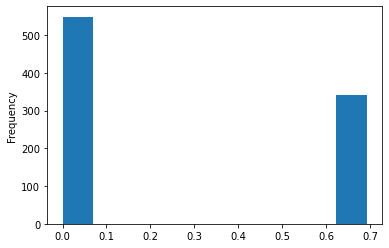

In [35]:
df3["log_Survived"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

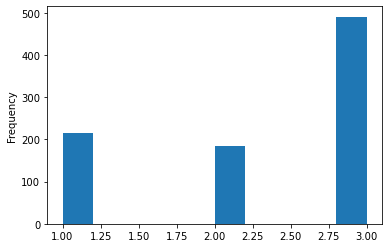

In [27]:
df3["Pclass"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

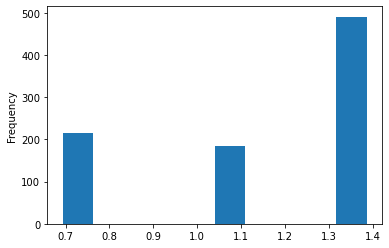

In [36]:
df3["log_Pclass"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

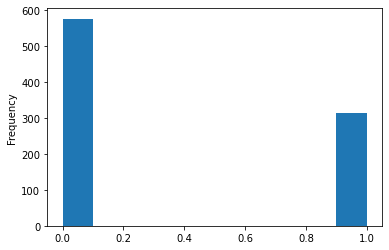

In [28]:
df3["Sex"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

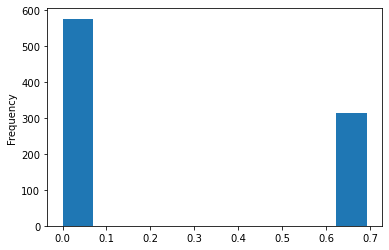

In [37]:
df3["log_Sex"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

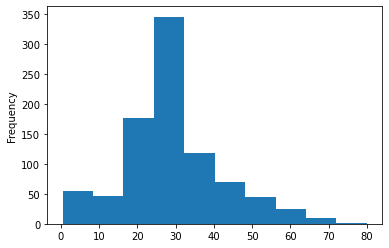

In [38]:
df3["Age"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

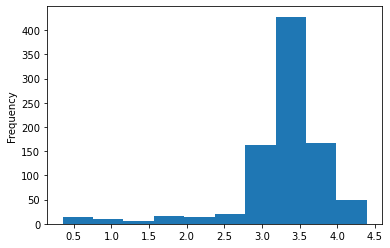

In [39]:
df3["log_Age"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

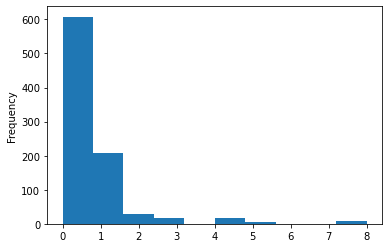

In [40]:
df3["SibSp"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

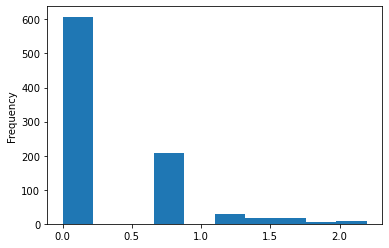

In [41]:
df3["log_SibSp"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

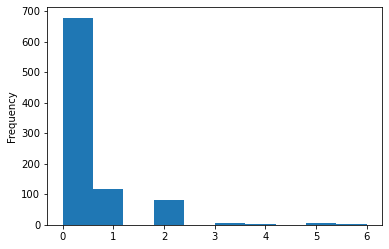

In [31]:
df3["Parch"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

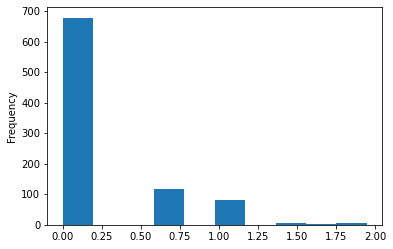

In [42]:
df3["log_Parch"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

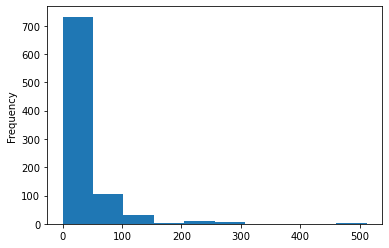

In [32]:
df3["Fare"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

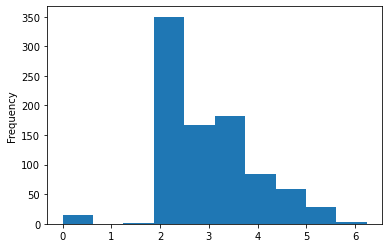

In [43]:
df3["log_Fare"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

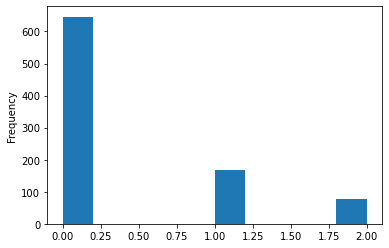

In [33]:
df3["Embarked"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

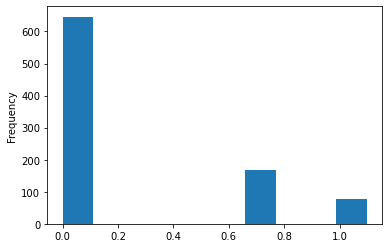

In [44]:
df3["log_Embarked"].plot(kind = 'hist')

In [46]:
df4=df2.copy()
sqrt_PassengerId = df2["PassengerId"]**(1/2)
sqrt_Survived = df2["Survived"]**(1/2)
sqrt_Pclass = df2["Pclass"]**(1/2)
sqrt_Sex = df2["Sex"]**(1/2)
sqrt_Age = df2["Age"]**(1/2)
sqrt_SibSp = df2["SibSp"]**(1/2)
sqrt_Parch = df2["Parch"]**(1/2)
sqrt_Fare = df2["Fare"]**(1/2)
sqrt_Embarked = df2["Embarked"]**(1/2)
df4.insert(1,"sqrt_PassengerId",sqrt_PassengerId)
df4.insert(3,"sqrt_Survived",sqrt_Survived)
df4.insert(5,"sqrt_Pclass",sqrt_Pclass)
df4.insert(7,"sqrt_Sex",sqrt_Sex)
df4.insert(9,"sqrt_Age",sqrt_Age)
df4.insert(11,"sqrt_SibSp",sqrt_SibSp)
df4.insert(13,"sqrt_Parch",sqrt_Parch)
df4.insert(15,"sqrt_Fare",sqrt_Fare)
df4.insert(17,"sqrt_Embarked",sqrt_Embarked)
df4

,PassengerId,sqrt_PassengerId,Survived,sqrt_Survived,Pclass,sqrt_Pclass,Sex,sqrt_Sex,Age,sqrt_Age,SibSp,sqrt_SibSp,Parch,sqrt_Parch,Fare,sqrt_Fare,Embarked,sqrt_Embarked
0,1,1.000000,0,0.0,3,1.732051,0,0.0,22.0,4.690416,1,1.0,0,0.000000,7.2500,2.692582,0.0,0.000000
1,2,1.414214,1,1.0,1,1.000000,1,1.0,38.0,6.164414,1,1.0,0,0.000000,71.2833,8.442944,1.0,1.000000
2,3,1.732051,1,1.0,3,1.732051,1,1.0,26.0,5.099020,0,0.0,0,0.000000,7.9250,2.815138,0.0,0.000000
3,4,2.000000,1,1.0,1,1.000000,1,1.0,35.0,5.916080,1,1.0,0,0.000000,53.1000,7.286975,0.0,0.000000
4,5,2.236068,0,0.0,3,1.732051,0,0.0,35.0,5.916080,0,0.0,0,0.000000,8.0500,2.837252,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,29.782545,0,0.0,2,1.414214,0,0.0,27.0,5.196152,0,0.0,0,0.000000,13.0000,3.605551,0.0,0.000000
887,888,29.799329,1,1.0,1,1.000000,1,1.0,19.0,4.358899,0,0.0,0,0.000000,30.0000,5.477226,0.0,0.000000
888,889,29.816103,0,0.0,3,1.732051,1,1.0,28.0,5.291503,1,1.0,2,1.414214,23.4500,4.842520,0.0,0.000000
889,890,29.832868,1,1.0,1,1.000000,0,0.0,26.0,5.099020,0,0.0,0,0.000000,30.0000,5.477226,1.0,1.000000


<AxesSubplot:ylabel='Frequency'>

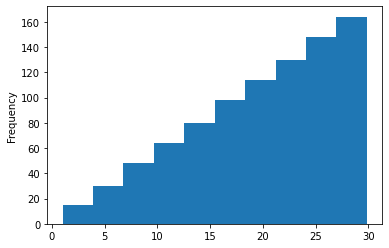

In [49]:
df4["sqrt_PassengerId"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

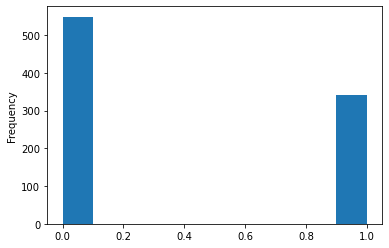

In [50]:
df4["sqrt_Survived"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

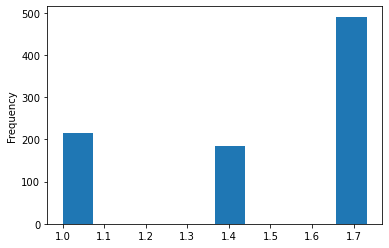

In [51]:
df4["sqrt_Pclass"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

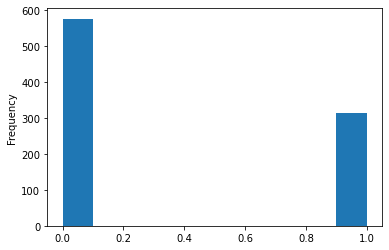

In [52]:
df4["sqrt_Sex"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

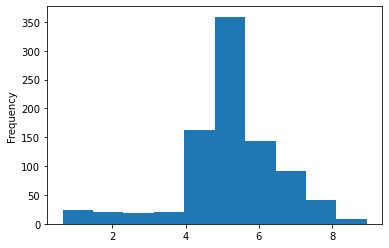

In [53]:
df4["sqrt_Age"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

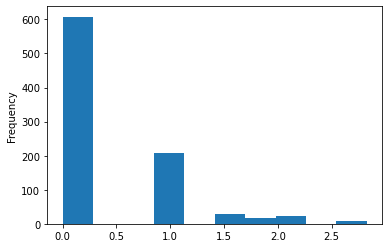

In [54]:
df4["sqrt_SibSp"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

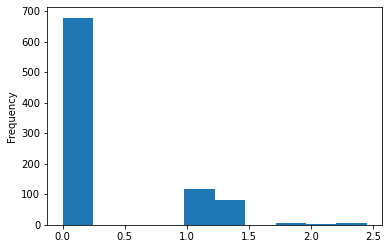

In [55]:
df4["sqrt_Parch"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

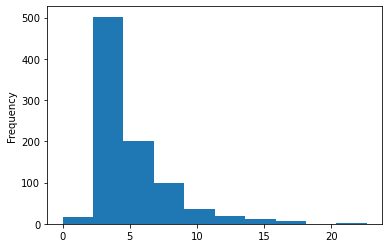

In [56]:
df4["sqrt_Fare"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

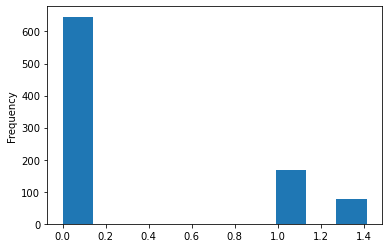

In [57]:
df4["sqrt_Embarked"].plot(kind = 'hist')

In [74]:
df5=df2.copy()
reciprocal_PassengerId = 1/df["PassengerId"]
reciprocal_Survived = 1/df["Survived"]
reciprocal_Pclass = 1/df["Pclass"]
reciprocal_Age = 1/df["Age"]
reciprocal_SibSp = 1/df["SibSp"]
reciprocal_Parch = 1/df["Parch"]
reciprocal_Fare = 1/df["Fare"]
df5.insert(1,"reciprocal_PassengerId",reciprocal_PassengerId)
df5.insert(3,"reciprocal_Survived",reciprocal_Survived)
df5.insert(5,"reciprocal_Pclass",reciprocal_Pclass)
df5.insert(8,"reciprocal_Age",reciprocal_Age)
df5.insert(10,"reciprocal_SibSp",reciprocal_SibSp)
df5.insert(12,"reciprocal_Parch",reciprocal_Parch)
df5.insert(14,"reciprocal_Fare",reciprocal_Fare)
df5

,PassengerId,reciprocal_PassengerId,Survived,reciprocal_Survived,Pclass,reciprocal_Pclass,Sex,Age,reciprocal_Age,SibSp,reciprocal_SibSp,Parch,reciprocal_Parch,Fare,reciprocal_Fare,Embarked
0,1,1.000000,0,inf,3,0.333333,0,22.0,0.045455,1,1.0,0,inf,7.2500,0.137931,0.0
1,2,0.500000,1,1.0,1,1.000000,1,38.0,0.026316,1,1.0,0,inf,71.2833,0.014029,1.0
2,3,0.333333,1,1.0,3,0.333333,1,26.0,0.038462,0,inf,0,inf,7.9250,0.126183,0.0
3,4,0.250000,1,1.0,1,1.000000,1,35.0,0.028571,1,1.0,0,inf,53.1000,0.018832,0.0
4,5,0.200000,0,inf,3,0.333333,0,35.0,0.028571,0,inf,0,inf,8.0500,0.124224,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.001127,0,inf,2,0.500000,0,27.0,0.037037,0,inf,0,inf,13.0000,0.076923,0.0
887,888,0.001126,1,1.0,1,1.000000,1,19.0,0.052632,0,inf,0,inf,30.0000,0.033333,0.0
888,889,0.001125,0,inf,3,0.333333,1,28.0,0.035714,1,1.0,2,0.5,23.4500,0.042644,0.0
889,890,0.001124,1,1.0,1,1.000000,0,26.0,0.038462,0,inf,0,inf,30.0000,0.033333,1.0


<AxesSubplot:ylabel='Frequency'>

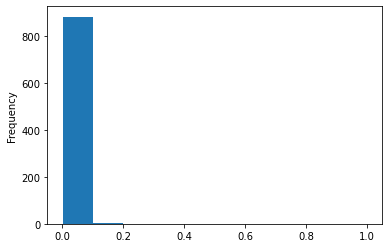

In [77]:
df5["reciprocal_PassengerId"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

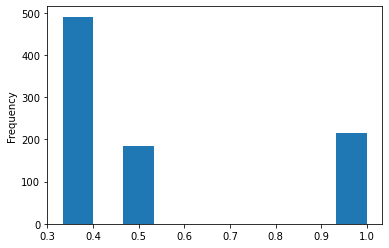

In [79]:
df5["reciprocal_Pclass"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

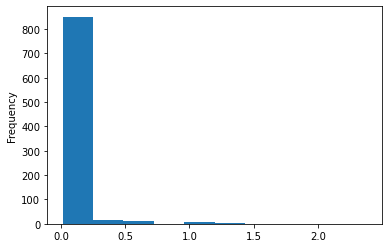

In [80]:
df5["reciprocal_Age"].plot(kind = 'hist')

In [95]:
from scipy.stats import boxcox
df6=df2.copy()
bcx_PassengerId, lam = boxcox(df2["PassengerId"])
bcx_Pclass, lam = boxcox(df2["Pclass"])
bcx_Age, lam = boxcox(df2["Age"])
df6.insert(1,"bcx_PassengerId",bcx_PassengerId)
df6.insert(4,"bcx_Pclass",bcx_Pclass)
df6.insert(7,"bcx_Age",bcx_Age)
df6

,PassengerId,bcx_PassengerId,Survived,Pclass,bcx_Pclass,Sex,Age,bcx_Age,SibSp,Parch,Fare,Embarked
0,1,0.000000,0,3,3.376116,0,22.0,13.468119,1,0,7.2500,0.0
1,2,0.895359,1,1,0.000000,1,38.0,21.498728,1,0,71.2833,1.0
2,3,1.663661,1,3,3.376116,1,26.0,15.563417,0,0,7.9250,0.0
3,4,2.359568,1,1,0.000000,1,35.0,20.056110,1,0,53.1000,0.0
4,5,3.006164,0,3,3.376116,0,35.0,20.056110,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,172.689028,0,2,1.359946,0,27.0,16.076643,0,0,13.0000,0.0
887,888,172.828281,1,1,0.000000,1,19.0,11.845513,0,0,30.0000,0.0
888,889,172.967488,0,3,3.376116,1,28.0,16.586014,1,2,23.4500,0.0
889,890,173.106649,1,1,0.000000,0,26.0,15.563417,0,0,30.0000,1.0


<AxesSubplot:ylabel='Frequency'>

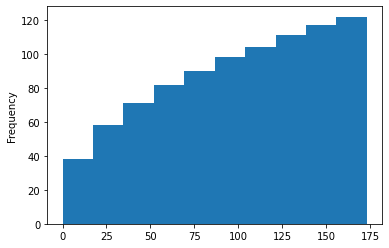

In [97]:
df6["bcx_PassengerId"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

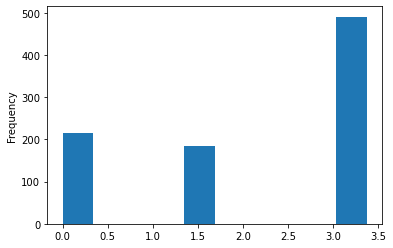

In [98]:
df6["bcx_Pclass"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

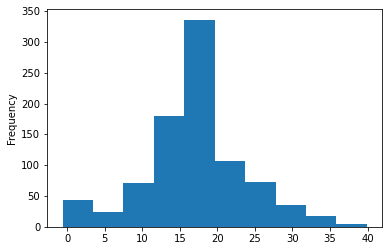

In [99]:
df6["bcx_Age"].plot(kind = 'hist')

In [111]:
from scipy.stats import yeojohnson
df7=df2.copy()
yf_PassengerId, lam = yeojohnson(df["PassengerId"])
yf_Survived, lam = yeojohnson(df["Survived"])
yf_Pclass, lam = yeojohnson(df["Pclass"])
yf_Age, lam = yeojohnson(df["Age"])
yf_SibSp, lam = yeojohnson(df["SibSp"])
yf_Parch, lam = yeojohnson(df["Parch"])
yf_Fare, lam = yeojohnson(df["Fare"])
df7.insert(1,"yf_PassengerId",yf_PassengerId)
df7.insert(3,"yf_Survived",yf_Survived)
df7.insert(5,"yf_Pclass",yf_Pclass)
df7.insert(8,"yf_Age",yf_Age)
df7.insert(10,"yf_SibSp",yf_SibSp)
df7.insert(12,"yf_Parch",yf_Parch)
df7.insert(14,"yf_Fare",yf_Fare)
df7

,PassengerId,yf_PassengerId,Survived,yf_Survived,Pclass,yf_Pclass,Sex,Age,yf_Age,SibSp,yf_SibSp,Parch,yf_Parch,Fare,yf_Fare,Embarked
0,1,0.896216,0,-0.000000,3,13.082161,0,22.0,13.788503,1,0.323389,0,-0.000000,7.2500,1.906724,0.0
1,2,1.666297,1,0.367093,1,1.905985,1,38.0,21.575367,1,0.323389,0,-0.000000,71.2833,3.497640,1.0
2,3,2.364423,1,0.367093,3,13.082161,1,26.0,15.820085,0,-0.000000,0,-0.000000,7.9250,1.970459,0.0
3,4,3.013501,1,0.367093,1,1.905985,1,35.0,20.176650,1,0.323389,0,-0.000000,53.1000,3.304258,0.0
4,5,3.625991,0,-0.000000,3,13.082161,0,35.0,20.176650,0,-0.000000,0,-0.000000,8.0500,1.981680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,175.243951,0,-0.000000,2,6.074735,0,27.0,16.317761,0,-0.000000,0,-0.000000,13.0000,2.326029,0.0
887,888,175.385592,1,0.367093,1,1.905985,1,19.0,12.215755,0,-0.000000,0,-0.000000,30.0000,2.916885,0.0
888,889,175.527187,0,-0.000000,3,13.082161,1,28.0,16.811708,1,0.323389,2,0.243296,23.4500,2.745246,0.0
889,890,175.668737,1,0.367093,1,1.905985,0,26.0,15.820085,0,-0.000000,0,-0.000000,30.0000,2.916885,1.0


<AxesSubplot:ylabel='Frequency'>

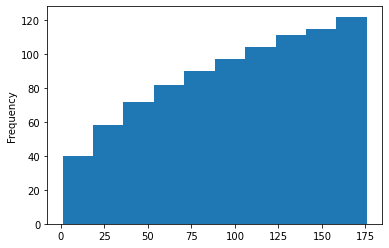

In [112]:
df7["yf_PassengerId"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

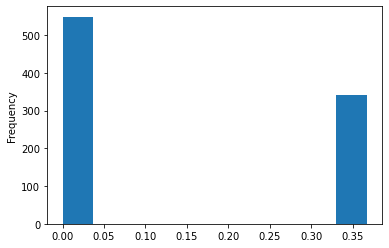

In [113]:
df7["yf_Survived"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

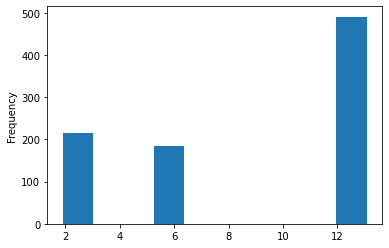

In [114]:
df7["yf_Pclass"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

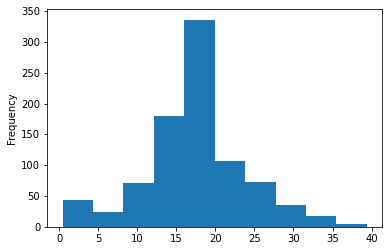

In [115]:
df7["yf_Age"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

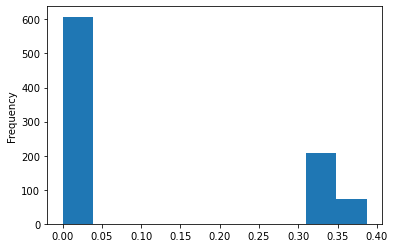

In [116]:
df7["yf_SibSp"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

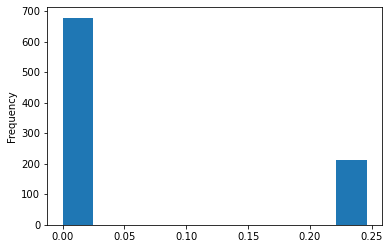

In [117]:
df7["yf_Parch"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

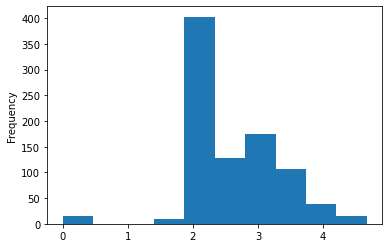

In [118]:
df7["yf_Fare"].plot(kind = 'hist')

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


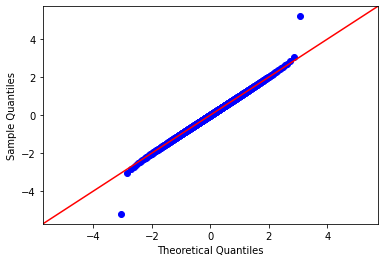

In [19]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution = 'normal')
df2["PassengerId"]=pd.DataFrame(qt.fit_transform(df2[["PassengerId"]]))
sm.qqplot(df2["PassengerId"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


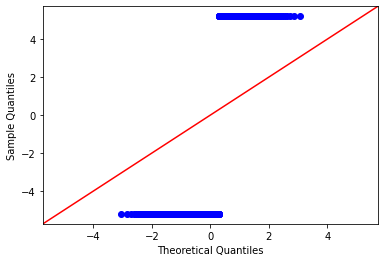

In [20]:
df2["Survived"]=pd.DataFrame(qt.fit_transform(df2[["Survived"]]))
sm.qqplot(df2["Survived"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


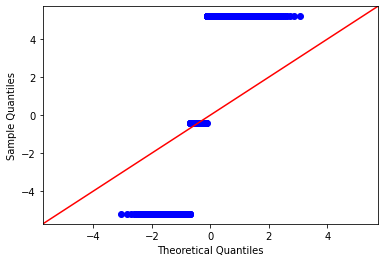

In [21]:
df2["Pclass"]=pd.DataFrame(qt.fit_transform(df2[["Pclass"]]))
sm.qqplot(df2["Pclass"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


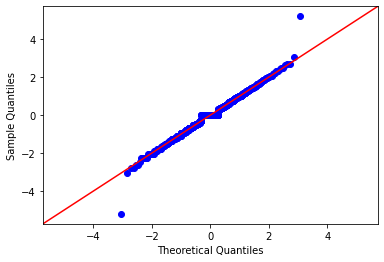

In [22]:
df2["Age"]=pd.DataFrame(qt.fit_transform(df2[["Age"]]))
sm.qqplot(df2["Age"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


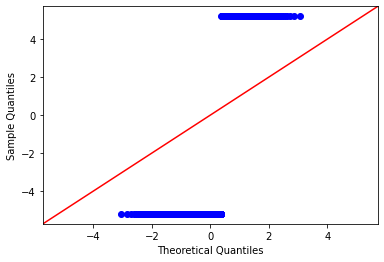

In [23]:
df2["Sex"]=pd.DataFrame(qt.fit_transform(df2[["Sex"]]))
sm.qqplot(df2["Sex"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


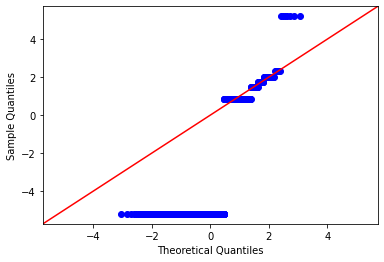

In [24]:
df2["SibSp"]=pd.DataFrame(qt.fit_transform(df2[["SibSp"]]))
sm.qqplot(df2["SibSp"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


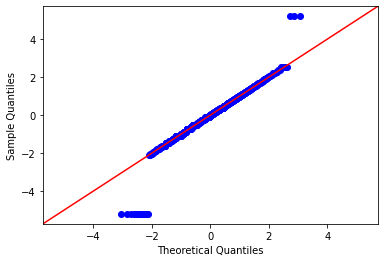

In [25]:
df2["Fare"]=pd.DataFrame(qt.fit_transform(df2[["Fare"]]))
sm.qqplot(df2["Fare"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


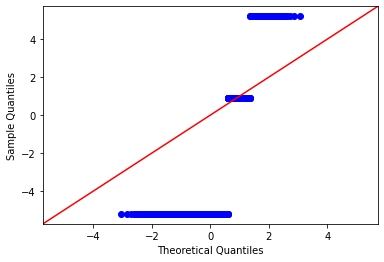

In [26]:
df2["Embarked"]=pd.DataFrame(qt.fit_transform(df2[["Embarked"]]))
sm.qqplot(df2["Embarked"],line='45')
plt.show()

C:\Users\SOWMIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


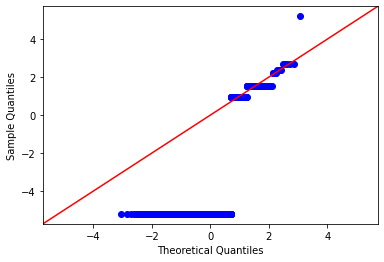

In [27]:
df2["Parch"]=pd.DataFrame(qt.fit_transform(df2[["Parch"]]))
sm.qqplot(df2["Parch"],line='45')
plt.show()